# Trabajo 2: Aspectos prácticos de las redes neuronales

En este segundo trabajo, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales que hemos visto en el Tema 4.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. 

In [1]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
import time
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Obtención de los datos y pre-processing

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

4423680/4422102 [==============================] - 1s 0us/step


## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se 
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

#### **Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación **

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados 

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

In [0]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
    
# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1**: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [17]:
print('Número de datos: ', x_train.shape[0])
print('Número de pixeles: ', x_train.shape[1], ' x ', x_train.shape[2])
print("Clase a predecir: ", np.unique(y_train))

Número de datos:  60000
Número de pixeles:  28  x  28
Clase a predecir:  [0 1 2 3 4 5 6 7 8 9]


Time (in seconds): 129.36042857170105
La accuracy en entrenamiento es:  0.7981666666666667
La accuracy en validación es:  0.7974166666666667
10000/10000 [==============================] - 0s 37us/step
La accuracy del model con los datos de test es:  0.7915


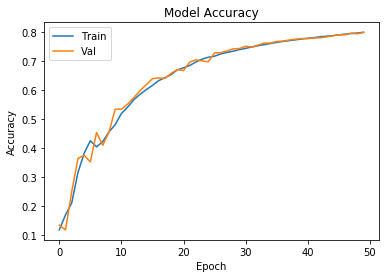

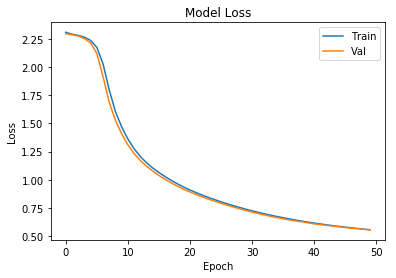

In [23]:
start = time.time()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Las imagenes son de 28x28 pixeles
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax) #Existen 10 categorías
])

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.2, verbose=0)

end = time.time()
print("Time (in seconds):", end - start)

print("La accuracy en entrenamiento es: ", np.max(history.history['acc']))
print("La accuracy en validación es: ", np.max(history.history['val_acc']))
print("La accuracy del model con los datos de test es: ",model.evaluate(x_test, y_test)[1])

plot_acc(history)
plot_loss(history)


Time (in seconds): 131.61619186401367
La accuracy en entrenamiento es:  0.9107291666666667
La accuracy en validación es:  0.8848333333333334
10000/10000 [==============================] - 0s 38us/step
La accuracy del model con los datos de test es:  0.876


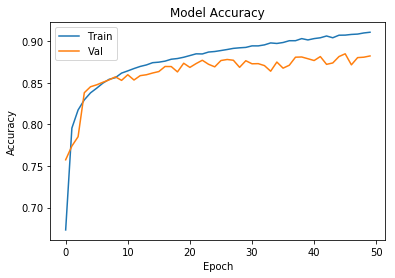

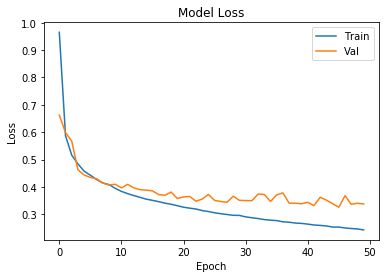

In [26]:
start = time.time()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Las imagenes son de 28x28 pixeles
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation=tf.nn.softmax) # Existen 10 categorías
])

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.2, verbose=0)

end = time.time()
print("Time (in seconds):", end - start)

print("La accuracy en entrenamiento es: ", np.max(history2.history['acc']))
print("La accuracy en validación es: ", np.max(history2.history['val_acc']))
print("La accuracy del model con los datos de test es: ",model.evaluate(x_test, y_test)[1])

plot_acc(history2)
plot_loss(history2)


A continuación se muestran ambos modelos (sigmoid y relu), donde se puede apreciar como el segundo modelo entrenado mediante funciones de activación ReLu, tiene un mejor accuray.  
Además los tiempos de entrenamiento registrados, nos permiten ver como ambos modelos son prácticamente igual de eficientes.

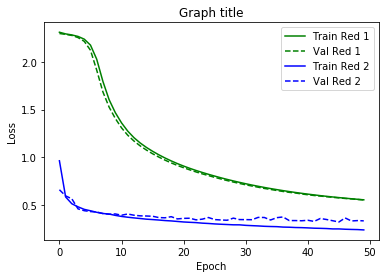

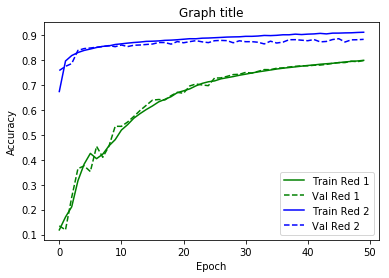

In [27]:
plot_compare_losses(history, history2)
plot_compare_accs(history, history2)


## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2**: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

### Inicialización con ceros

Time (in seconds): 52.86201882362366
La accuracy en entrenamiento es:  0.1010625
La accuracy en validación es:  0.09575
10000/10000 [==============================] - 0s 39us/step
La accuracy del model con los datos de test es:  0.1


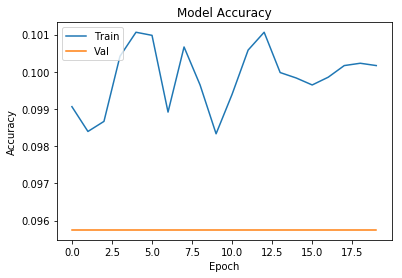

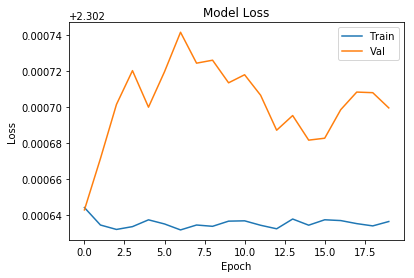

In [29]:
start = time.time()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Las imagenes son de 28x28 pixeles
    keras.layers.Dense(128, activation='relu', kernel_initializer='zero', bias_initializer='zero'),
    keras.layers.Dense(100, activation='relu', kernel_initializer='zero', bias_initializer='zero'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='zero', bias_initializer='zero'),
    keras.layers.Dense(10, activation=tf.nn.softmax) # Existen 10 categorías
])

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, verbose=0)

end = time.time()
print("Time (in seconds):", end - start)

print("La accuracy en entrenamiento es: ", np.max(history.history['acc']))
print("La accuracy en validación es: ", np.max(history.history['val_acc']))
print("La accuracy del model con los datos de test es: ",model.evaluate(x_test, y_test)[1])
plot_acc(history)
plot_loss(history)

### Inicialización con una variable aleatoria normal.

Time (in seconds): 62.39222979545593
La accuracy en entrenamiento es:  0.862375
La accuracy en validación es:  0.8589166666666667
10000/10000 [==============================] - 0s 39us/step
La accuracy del model con los datos de test es:  0.8416


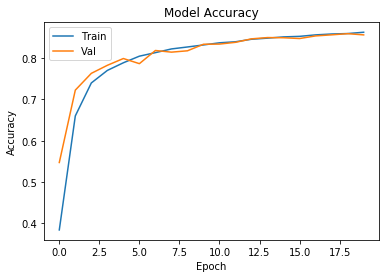

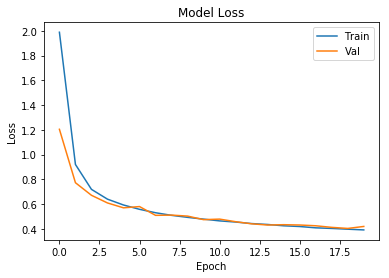

In [30]:
start = time.time()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Las imagenes son de 28x28 pixeles
    keras.layers.Dense(128, activation='relu', kernel_initializer='random_uniform', bias_initializer='random_uniform'),
    keras.layers.Dense(100, activation='relu', kernel_initializer='random_uniform', bias_initializer='random_uniform'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='random_uniform', bias_initializer='random_uniform'),
    keras.layers.Dense(10, activation=tf.nn.softmax) # Existen 10 categorías
])

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, verbose=0)

end = time.time()
print("Time (in seconds):", end - start)

print("La accuracy en entrenamiento es: ", np.max(history2.history['acc']))
print("La accuracy en validación es: ", np.max(history2.history['val_acc']))
print("La accuracy del model con los datos de test es: ",model.evaluate(x_test, y_test)[1])
plot_acc(history2)
plot_loss(history2)

### Inicialización con los valores por defecto

Time (in seconds): 64.09667992591858
La accuracy en entrenamiento es:  0.8808958333333333
La accuracy en validación es:  0.8730833333333333
10000/10000 [==============================] - 0s 47us/step
La accuracy del model con los datos de test es:  0.863


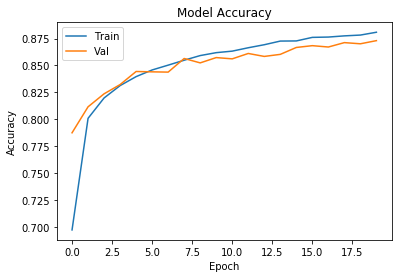

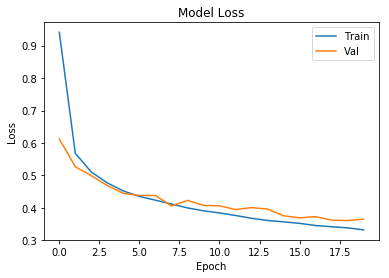

In [31]:
start = time.time()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Las imagenes son de 28x28 pixeles
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation=tf.nn.softmax) # Existen 10 categorías
])

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history3 = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, verbose=0)

end = time.time()
print("Time (in seconds):", end - start)

print("La accuracy en entrenamiento es: ", np.max(history3.history['acc']))
print("La accuracy en validación es: ", np.max(history3.history['val_acc']))
print("La accuracy del model con los datos de test es: ",model.evaluate(x_test, y_test)[1])
plot_acc(history3)
plot_loss(history3)

Se puede observar como la inicialización mediante ceros, proporciona un bajo accuracy ya que todas tienen el mismo gradiante durante el back-propagation y por tanto cambian los parámetros de igual manera.  
Por otro lado, la tanto la estradegía de inicialización a partir de una variable aleatoria normal o por defecto dan precisiones muy parecidas siendo la inicialización por defecto algo superior.

A nivel de eficiencia se puede ver como la inicialización por defecto tarda un poco más en ejecutarse, siendo la inicialización con ceros la más rápida.

## 3. Optimizadores

**Ejercicio 3**: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

### SGD

Time (in seconds): 52.460166215896606
La accuracy en entrenamiento es:  0.8778125
La accuracy en validación es:  0.872
10000/10000 [==============================] - 0s 39us/step
La accuracy del model con los datos de test es:  0.862


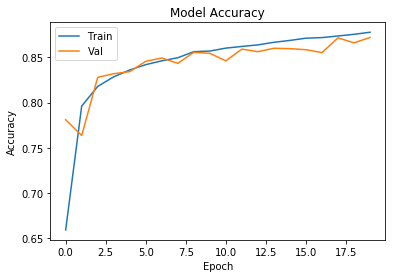

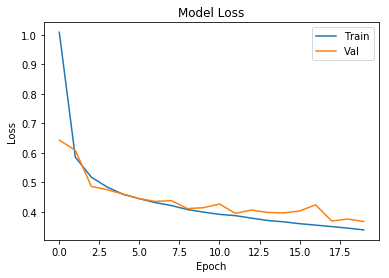

In [34]:
start = time.time()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Las imagenes son de 28x28 pixeles
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation=tf.nn.softmax) # Existen 10 categorías
])

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, verbose=0)

end = time.time()
print("Time (in seconds):", end - start)

print("La accuracy en entrenamiento es: ", np.max(history.history['acc']))
print("La accuracy en validación es: ", np.max(history.history['val_acc']))
print("La accuracy del model con los datos de test es: ",model.evaluate(x_test, y_test)[1])
plot_acc(history)
plot_loss(history)

### Adam

Time (in seconds): 74.83884453773499
La accuracy en entrenamiento es:  0.933375
La accuracy en validación es:  0.895
10000/10000 [==============================] - 0s 44us/step
La accuracy del model con los datos de test es:  0.8888


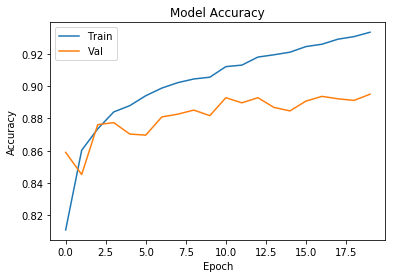

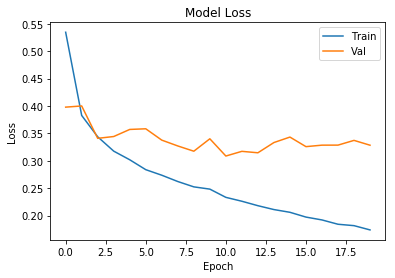

In [35]:
start = time.time()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Las imagenes son de 28x28 pixeles
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation=tf.nn.softmax) # Existen 10 categorías
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, verbose=0)

end = time.time()
print("Time (in seconds):", end - start)

print("La accuracy en entrenamiento es: ", np.max(history.history['acc']))
print("La accuracy en validación es: ", np.max(history.history['val_acc']))
print("La accuracy del model con los datos de test es: ",model.evaluate(x_test, y_test)[1])
plot_acc(history)
plot_loss(history)

### RMSprop

Time (in seconds): 59.793620347976685
La accuracy en entrenamiento es:  0.917
La accuracy en validación es:  0.8898888888888888
10000/10000 [==============================] - 0s 40us/step
La accuracy del model con los datos de test es:  0.8806


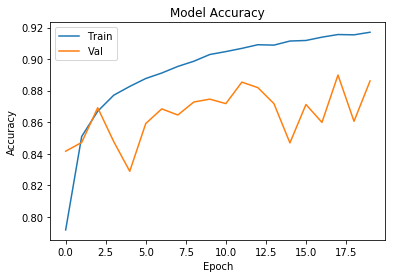

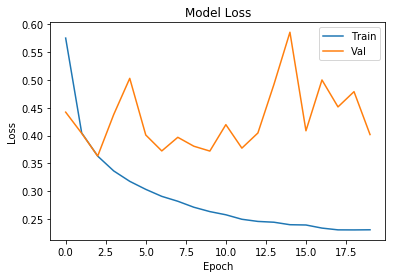

In [33]:
start = time.time()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Las imagenes son de 28x28 pixeles
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation=tf.nn.softmax) # Existen 10 categorías
])

model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, verbose=0)

end = time.time()
print("Time (in seconds):", end - start)

print("La accuracy en entrenamiento es: ", np.max(history.history['acc']))
print("La accuracy en validación es: ", np.max(history.history['val_acc']))
print("La accuracy del model con los datos de test es: ",model.evaluate(x_test, y_test)[1])
plot_acc(history)
plot_loss(history)

In [0]:
Como se puede observar, tanto el estimador Adam como el estimador RMSprop dan una mejor precisión en comparación con el estimador SGD.  
El estimador Adam es aque que tiene más precisión pero siendo también el estimador que provoca que el modelo tenga una peor eficiencia.

## 4. Regularización y red final

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

Epoch 00008: early stopping
Time (in seconds): 92.46760058403015
La accuracy en entrenamiento es:  0.924
La accuracy en validación es:  0.89425


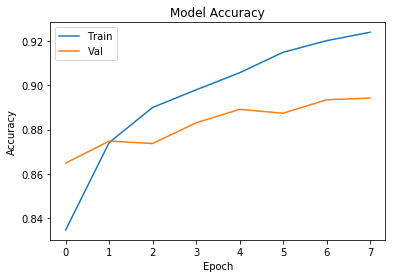

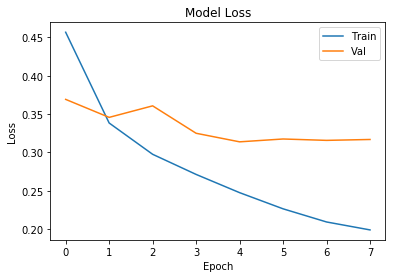

In [40]:
start = time.time()
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28, 28)), #Las imagenes son de 28x28 pixeles
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation=tf.nn.softmax) # Existen 10 categorías
])
e = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, callbacks=[e], verbose=0)

end = time.time()
print("Time (in seconds):", end - start)
print("La accuracy en entrenamiento es: ", np.max(history.history['acc']))
print("La accuracy en validación es: ", np.max(history.history['val_acc']))
plot_acc(history)
plot_loss(history)

### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

In [41]:
print("La accuracy del model con los datos de test es: ",model.evaluate(x_test, y_test)[1])


10000/10000 [==============================] - 1s 80us/step
La accuracy del model con los datos de test es:  0.8842


La precisión obtenida se acerca bastante a los usados en la validación pero distan algo de la precisión obtenida con los datos de entrenamiento por lo que se podría decir que el modelo sufre de un poco de overfitting pero la precisión arrojada es entorno al 88%